## <i>Data Preparation - Regression</i>

In [195]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

In [196]:
df = pd.read_csv('KSI.csv')

In [197]:
df.head(3)

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourhood,ObjectId
0,-8.829728e+06,5.419071e+06,3389067,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),1
1,-8.829728e+06,5.419071e+06,3389068,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),2
2,-8.829728e+06,5.419071e+06,3389069,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),3


In [198]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16093 entries, 0 to 16092
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              16093 non-null  float64
 1   Y              16093 non-null  float64
 2   Index_         16093 non-null  int64  
 3   ACCNUM         16093 non-null  int64  
 4   YEAR           16093 non-null  int64  
 5   DATE           16093 non-null  object 
 6   TIME           16093 non-null  int64  
 7   HOUR           16093 non-null  int64  
 8   STREET1        16093 non-null  object 
 9   STREET2        14698 non-null  object 
 10  OFFSET         2388 non-null   object 
 11  ROAD_CLASS     15725 non-null  object 
 12  District       16080 non-null  object 
 13  WardNum        13795 non-null  float64
 14  Division       16093 non-null  int64  
 15  LATITUDE       16093 non-null  float64
 16  LONGITUDE      16093 non-null  float64
 17  LOCCOORD       15963 non-null  object 
 18  ACCLOC

<i>We see that there are a total of 55 columns in our dataset, with varying levels of sample size. While certain features would be useful (such as SPEEDING, REDLIGHT, ALCOHOL) the sample sizes are drastically smaller than other features in this dataset. For this reason, the research group has elected to omit these from the feature selection process.

We have identified that <b><font color = "red">INJURY TYPE</font></b> will be our target feature, as the business problem directly relates to investigating the factors determining what may constitute a serious or fatal injury.

<b><u>SHAPE</u></b>: We can see that the shape of our dataset is 16,093 rows and 56 columns. The features consist of 6 float types, 8 integer types, and 42 object types.</i> 

In [199]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,16093.0,-8.838289e+06,1.158697e+04,-8.865305e+06,-8.846374e+06,-8.838364e+06,-8.829647e+06,-8.808254e+06
Y,16093.0,5.420851e+06,8.675426e+03,5.402526e+06,5.413383e+06,5.419648e+06,5.427921e+06,5.443099e+06
Index_,16093.0,3.252283e+07,3.594367e+07,3.363207e+06,5.332810e+06,7.423775e+06,8.050395e+07,8.140853e+07
ACCNUM,16093.0,2.296710e+09,3.253387e+09,1.284070e+05,1.069209e+06,1.290852e+06,5.001873e+09,9.085345e+09
YEAR,16093.0,2.011896e+03,4.010676e+00,2.006000e+03,2.008000e+03,2.012000e+03,2.015000e+03,2.019000e+03
TIME,16093.0,1.348327e+03,6.306883e+02,0.000000e+00,9.070000e+02,1.440000e+03,1.840000e+03,2.359000e+03
HOUR,16093.0,1.331088e+01,6.123885e+00,0.000000e+00,9.000000e+00,1.400000e+01,1.800000e+01,2.300000e+01
WardNum,13795.0,1.209424e+01,7.283801e+00,1.000000e+00,6.000000e+00,1.100000e+01,1.900000e+01,2.500000e+01
Division,16093.0,3.422016e+01,1.454478e+01,1.100000e+01,2.200000e+01,3.300000e+01,4.300000e+01,5.500000e+01
LATITUDE,16093.0,4.371113e+01,5.632519e-02,4.359205e+01,4.366264e+01,4.370334e+01,4.375704e+01,4.385545e+01


<i>Unfortunately using the <b>.describe()</b> function is not useful at this stage as our features of interest are categorical in nature and therefore consists of string data.

### <i>Addressing Found Issues</i>

As illustrated in the Exploration phase, the following columns must be set on a numerical scale for the purposes of regression modelling:

    ROAD_CLASS
    TRAFFCTRL
    VISIBILITY
    LIGHT
    RDSFCOND
    INVTYPE
    INVAGE
    INJURY
    VEHTYPE
    DRIVCOND

For regression purposes and to ensure our regression models are easily manageable, the group has elected to grade the classes within each feature on a scale, to be described below.

In [200]:
# First, let's duplicate the original df dataframe for classification so to ensure the main frame is intact.
df_reg = df.copy()

In [201]:
df_reg.head(3)

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourhood,ObjectId
0,-8.829728e+06,5.419071e+06,3389067,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),1
1,-8.829728e+06,5.419071e+06,3389068,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),2
2,-8.829728e+06,5.419071e+06,3389069,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),3


In [202]:
df_reg.tail(3)

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourhood,ObjectId
16090,-8.837083e+06,5.412746e+06,81340413,9002500260,2019,2019/12/28 05:00:00+00,1514,15,GERRARD ST,BAY ST,...,NaN,NaN,NaN,Yes,Yes,NaN,NaN,76,Bay Street Corridor (76),16091
16091,-8.837083e+06,5.412746e+06,81340414,9002500260,2019,2019/12/28 05:00:00+00,1514,15,GERRARD ST,BAY ST,...,NaN,NaN,NaN,Yes,Yes,NaN,NaN,76,Bay Street Corridor (76),16092
16092,-8.837083e+06,5.412746e+06,81340415,9002500260,2019,2019/12/28 05:00:00+00,1514,15,GERRARD ST,BAY ST,...,NaN,NaN,NaN,Yes,Yes,NaN,NaN,76,Bay Street Corridor (76),16093


<i>Great, all of our rows appear in our new regression dataframe. Now let's work on the scaling.</i>

#### <i>INJURY

The INJURY feature will be graded based on the severity of the impact of injury, with 5 being the most severe (Fatal) and 1 being the least (None):
    
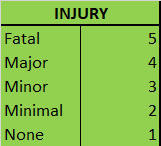

In [203]:
# Creating a dictionary of replacement values
df_reg['INJURY'].replace({'Fatal': '5', 'Major': '4', 'Minor': '3', 'Minimal': '2', 'None': '1'})

0        4
1        3
2        3
3        3
4        3
        ..
16088    1
16089    4
16090    1
16091    1
16092    4
Name: INJURY, Length: 16093, dtype: object

In [204]:
# Passing the dictionary of replacement values into the Series replace method
df_reg['INJURY']=df_reg['INJURY'].replace({'Fatal': '5', 'Major': '4', 'Minor': '3', 'Minimal': '2', 'None': '1'})

In [205]:
print(df_reg.groupby("INJURY").size())

INJURY
1    6068
2     996
3    1264
4    5375
5     781
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [206]:
print(df.groupby("INJURY").size())

INJURY
Fatal       781
Major      5375
Minimal     996
Minor      1264
None       6068
dtype: int64


<i>Perfect! All records are included in our reclassification for INJURY.</i>

#### <i>ROAD_CLASS

The ROAD_CLASS feature will be graded based on the road class's speed and traffic on a level from 9 to 0, with 9 being the busiest (Expressway) and 0 being the least, or inconsequential for our purposes (Other, Pending):

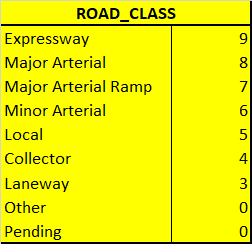

In [207]:
# Creating a dictionary of replacement values
df_reg['ROAD_CLASS'].replace({'Expressway': '9', 'Major Arterial': '8', 'Major Arterial Ramp': '7', 'Minor Arterial': '6', 'Local': '5', 'Collector': '4', 'Laneway': '3', 'Other': '0', 'Pending': '0'})

0        8
1        8
2        8
3        8
4        8
        ..
16088    8
16089    8
16090    8
16091    8
16092    8
Name: ROAD_CLASS, Length: 16093, dtype: object

In [208]:
# Passing the dictionary of replacement values into the Series replace method
df_reg['ROAD_CLASS']=df_reg['ROAD_CLASS'].replace({'Expressway': '9', 'Major Arterial': '8', 'Major Arterial Ramp': '7', 'Minor Arterial': '6', 'Local': '5', 'Collector': '4', 'Laneway': '3', 'Other': '0', 'Pending': '0'})

In [209]:
print(df_reg.groupby("ROAD_CLASS").size())

ROAD_CLASS
0       46
3       10
4      900
5      727
6     2462
7        1
8    11555
9       24
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [210]:
46+10+900+727+2462+1+11555+24

15725

In [211]:
print(df.groupby("ROAD_CLASS").size())

ROAD_CLASS
Collector                900
Expressway                24
Laneway                   10
Local                    727
Major Arterial         11555
Major Arterial Ramp        1
Minor Arterial          2462
Other                     33
Pending                   13
dtype: int64


In [212]:
900+24+10+727+11555+1+2462+33+13

15725

<i>Perfect! All records are included in our reclassification for ROAD_CLASS.</i>

#### <i>TRAFFCTL

    The TRAFFCTL (Traffic Control) feature will be graded based on the control's level security on a scale from 11 to 1, with 11 being the highest control (Traffic Gate) and 1 being the least (No Control):

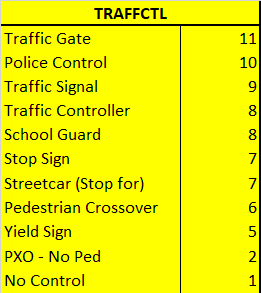

In [213]:
# Creating a dictionary of replacement values
df_reg['TRAFFCTL'].replace({'Traffic Gate': '11', 'Police Control': '10', 'Traffic Signal': '9', 'Traffic Controller': '8', 'School Guard': '8', 'Stop Sign': '7', 'Streetcar (Stop for)': '7', 'Pedestrian Crossover': '6', 'Yield Sign': '5', 'PXO - No Ped': '2', 'No Control': '1'})

0        1
1        1
2        1
3        1
4        1
        ..
16088    1
16089    1
16090    9
16091    9
16092    9
Name: TRAFFCTL, Length: 16093, dtype: object

In [214]:
# Passing the dictionary of replacement values into the Series replace method
df_reg['TRAFFCTL']=df_reg['TRAFFCTL'].replace({'Traffic Gate': '11', 'Police Control': '10', 'Traffic Signal': '9', 'Traffic Controller': '8', 'School Guard': '8', 'Stop Sign': '7', 'Streetcar (Stop for)': '7', 'Pedestrian Crossover': '6', 'Yield Sign': '5', 'PXO - No Ped': '2', 'No Control': '1'})

In [215]:
print(df_reg.groupby("TRAFFCTL").size())

TRAFFCTL
1     7692
10       2
11       5
2        2
5       13
6      189
7     1288
8      102
9     6771
dtype: int64


<i>Our feature is now fully reclassified. Let's make sure it contains the same amount of rows.</i>

In [216]:
7692+2+5+2+13+189+1288+102+6771

16064

In [217]:
print(df.groupby("TRAFFCTL").size())

TRAFFCTL
No Control              7692
PXO - No Ped               2
Pedestrian Crossover     189
Police Control             2
School Guard               2
Stop Sign               1272
Streetcar (Stop for)      16
Traffic Controller       100
Traffic Gate               5
Traffic Signal          6771
Yield Sign                13
dtype: int64


In [218]:
7692+2+189+2+2+1272+16+100+5+6771+13

16064

<i>Perfect! All records are included in our reclassification for TRAFFCTL.</i>

#### <i>VISIBILITY

The VISIBILITY feature will be graded on a level from 9 to 0, with 9 being the least visible (Drifting Snow) and 0 being the least, or inconsequential for our purposes (Other):

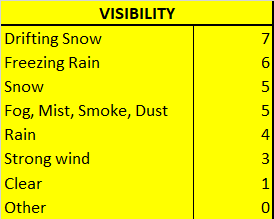

In [219]:
# Creating a dictionary of replacement values
df_reg['VISIBILITY'].replace({'Drifting Snow': '7', 'Freezing Rain': '6', 'Snow': '5', 'Fog, Mist, Smoke, Dust': '5', 'Rain': '4', 'Strong wind': '3', 'Clear': '1', 'Other': '0'})

0        1
1        1
2        1
3        1
4        1
        ..
16088    1
16089    1
16090    1
16091    1
16092    1
Name: VISIBILITY, Length: 16093, dtype: object

In [220]:
# Passing the dictionary of replacement values into the Series replace method
df_reg['VISIBILITY']=df_reg['VISIBILITY'].replace({'Drifting Snow': '7', 'Freezing Rain': '6', 'Snow': '5', 'Fog, Mist, Smoke, Dust': '5', 'Rain': '4', 'Strong wind': '3', 'Clear': '1', 'Other': '0'})

In [221]:
print(df_reg.groupby("VISIBILITY").size())

VISIBILITY
0       99
1    13814
3        8
4     1711
5      377
6       43
7       19
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [222]:
99+13814+8+1711+377+43+19

16071

In [223]:
print(df.groupby("VISIBILITY").size())

VISIBILITY
Clear                     13814
Drifting Snow                19
Fog, Mist, Smoke, Dust       44
Freezing Rain                43
Other                        99
Rain                       1711
Snow                        333
Strong wind                   8
dtype: int64


In [224]:
13814+19+44+43+99+1711+333+8

16071

<i>Perfect! All records are included in our reclassification for VISIBILITY.</i>

#### <i>LIGHT

The LIGHT feature will be graded on a level from 6 to 0, with 9 being the darkest (Dark) and 0 being the least, or inconsequential for our purposes (Other):

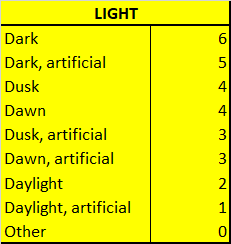

In [225]:
# Creating a dictionary of replacement values
df_reg['LIGHT'].replace({'Dark': '6', 'Dark, artificial': '5', 'Dusk': '4', 'Dawn': '4', 'Dusk, artificial': '3', 'Dawn, artificial': '3', 'Daylight': '2', 'Daylight, artificial': '1', 'Other': '0'})

0        6
1        6
2        6
3        6
4        6
        ..
16088    5
16089    5
16090    2
16091    2
16092    2
Name: LIGHT, Length: 16093, dtype: object

In [226]:
# Passing the dictionary of replacement values into the Series replace method
df_reg['LIGHT']=df_reg['LIGHT'].replace({'Dark': '6', 'Dark, artificial': '5', 'Dusk': '4', 'Dawn': '4', 'Dusk, artificial': '3', 'Dawn, artificial': '3', 'Daylight': '2', 'Daylight, artificial': '1', 'Other': '0'})

In [227]:
print(df_reg.groupby("LIGHT").size())

LIGHT
0       6
1     124
2    9255
3     251
4     323
5    2609
6    3525
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [228]:
6+124+9255+251+323+2609+3525

16093

In [229]:
print(df.groupby("LIGHT").size())

LIGHT
Dark                    3525
Dark, artificial        2609
Dawn                     102
Dawn, artificial          85
Daylight                9255
Daylight, artificial     124
Dusk                     221
Dusk, artificial         166
Other                      6
dtype: int64


In [230]:
3525+2609+102+85+9255+124+221+166+6

16093

<i>Perfect! All records are included in our reclassification for LIGHT.</i>

#### <i>RDSFCOND

The RDSFCOND (Road Surface Condition) feature will be graded based on the danger of the road condition on a level from 8 to 0, with 8 being the most dangerous (Ice) and 0 being the least, or inconsequential for our purposes (Other):

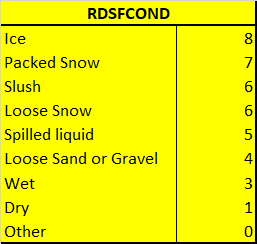

In [231]:
# Creating a dictionary of replacement values
df_reg['RDSFCOND'].replace({'Ice': '8', 'Packed Snow': '7', 'Slush': '6', 'Loose Snow': '6', 'Spilled liquid': '5', 'Loose Sand or Gravel': '4', 'Wet': '3', 'Dry': '1', 'Other': '0'})

0        3
1        3
2        3
3        3
4        3
        ..
16088    1
16089    1
16090    1
16091    1
16092    1
Name: RDSFCOND, Length: 16093, dtype: object

In [232]:
# Passing the dictionary of replacement values into the Series replace method
df_reg['RDSFCOND']=df_reg['RDSFCOND'].replace({'Ice': '8', 'Packed Snow': '7', 'Slush': '6', 'Loose Snow': '6', 'Spilled liquid': '5', 'Loose Sand or Gravel': '4', 'Wet': '3', 'Dry': '1', 'Other': '0'})

In [233]:
print(df_reg.groupby("RDSFCOND").size())

RDSFCOND
0      147
1    12820
3     2718
4        7
5        1
6      258
7       42
8       73
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [234]:
147+12820+2718+7+1+258+42+73

16066

In [235]:
print(df.groupby("RDSFCOND").size())

RDSFCOND
Dry                     12820
Ice                        73
Loose Sand or Gravel        7
Loose Snow                162
Other                     147
Packed Snow                42
Slush                      96
Spilled liquid              1
Wet                      2718
dtype: int64


In [236]:
12820+73+7+162+147+42+96+1+2718

16066

<i>Perfect! All records are included in our reclassification for RDSFCOND.</i>

#### <i>INVTYPE

The INVTYPE (Involvement Type) feature will be graded based on the accident party's vulnerability for serious injury on a scale from 8 to 0, with 8 being the most vulnerable (Wheelchair) and 0 being the least, or inconsequential for our purposes (Other, Other Property Owner):

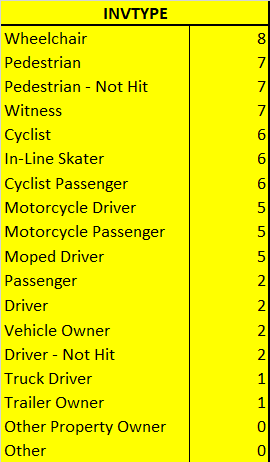

In [237]:
# Creating a dictionary of replacement values
df_reg['INVTYPE'].replace({'Wheelchair': '8', 'Pedestrian': '7', 'Pedestrian - Not Hit': '7', 'Witness': '7', 'Cyclist': '6', 'In-Line Skater': '6', 'Cyclist Passenger': '6', 'Motorcycle Driver': '5', 'Motorcycle Passenger': '5', 'Moped Driver': '5', 'Passenger': '2', 'Driver': '2', 'Vehicle Owner': '2', 'Driver - Not Hit': '2', 'Truck Driver': '1', 'Trailer Owner': '1', 'Other Property Owner': '0', 'Other': '0'})

0        2
1        2
2        2
3        2
4        2
        ..
16088    2
16089    7
16090    2
16091    2
16092    7
Name: INVTYPE, Length: 16093, dtype: object

In [238]:
# Passing the dictionary of replacement values into the Series replace method
df_reg['INVTYPE']=df_reg['INVTYPE'].replace({'Wheelchair': '8', 'Pedestrian': '7', 'Pedestrian - Not Hit': '7', 'Witness': '7', 'Cyclist': '6', 'In-Line Skater': '6', 'Cyclist Passenger': '6', 'Motorcycle Driver': '5', 'Motorcycle Passenger': '5', 'Moped Driver': '5', 'Passenger': '2', 'Driver': '2', 'Vehicle Owner': '2', 'Driver - Not Hit': '2', 'Truck Driver': '1', 'Trailer Owner': '1', 'Other Property Owner': '0', 'Other': '0'})

In [239]:
print(df_reg.groupby("INVTYPE").size())

INVTYPE
0      414
1      299
2    11341
5      608
6      691
7     2717
8       13
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [240]:
414+299+11341+608+691+2717+13

16083

In [241]:
print(df.groupby("INVTYPE").size())

INVTYPE
Cyclist                  684
Cyclist Passenger          2
Driver                  7263
Driver - Not Hit          16
In-Line Skater             5
Moped Driver              27
Motorcycle Driver        551
Motorcycle Passenger      30
Other                    157
Other Property Owner     257
Passenger               2426
Pedestrian              2715
Pedestrian - Not Hit       1
Trailer Owner              2
Truck Driver             297
Vehicle Owner           1636
Wheelchair                13
Witness                    1
dtype: int64


In [242]:
(7263+16+2426+297+1636)+(684+2+27+551+30)+(5+2715+1+13)+(157+257+2+1)

16083

<i>Perfect! All records are included in our reclassification for INVTYPE.</i>

#### <i>INVAGE

The INVAGE (Involved Age) feature will be graded based on the individual's age on a scale from 20 to 0, with 20 being the oldest (Over 95) and 0 being the least, or inconsequential for our purposes (unknown):

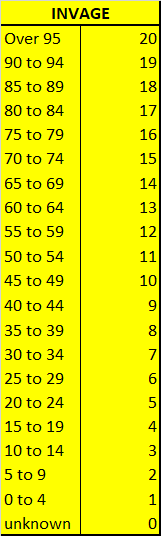

In [243]:
# Creating a dictionary of replacement values
df_reg['INVAGE'].replace({'0 to 4': '1', '5 to 9': '2', '10 to 14': '3', '15 to 19': '4', '20 to 24': '5', '25 to 29': '6', '30 to 34': '7', '35 to 39': '8', '40 to 44': '9', '45 to 49': '10', '50 to 54': '11', '55 to 59': '12', '60 to 64': '13', '65 to 69': '14', '70 to 74': '15', '75 to 79': '16', '80 to 84': '17', '85 to 89': '18', '90 to 94': '19', 'Over 95': '20', 'unknown': '0'})

0        11
1         4
2        12
3         5
4         4
         ..
16088     5
16089     3
16090    11
16091     6
16092     6
Name: INVAGE, Length: 16093, dtype: object

In [244]:
# Passing the dictionary of replacement values into the Series replace method
df_reg['INVAGE']=df_reg['INVAGE'].replace({'0 to 4': '1', '5 to 9': '2', '10 to 14': '3', '15 to 19': '4', '20 to 24': '5', '25 to 29': '6', '30 to 34': '7', '35 to 39': '8', '40 to 44': '9', '45 to 49': '10', '50 to 54': '11', '55 to 59': '12', '60 to 64': '13', '65 to 69': '14', '70 to 74': '15', '75 to 79': '16', '80 to 84': '17', '85 to 89': '18', '90 to 94': '19', 'Over 95': '20', 'unknown': '0'})

In [245]:
print(df_reg.groupby("INVAGE").size())

INVAGE
0     2541
1      156
10    1104
11    1150
12     937
13     743
14     586
15     463
16     390
17     292
18     191
19      54
2      175
20      14
3      214
4      738
5     1484
6     1417
7     1174
8     1136
9     1134
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [246]:
2541+156+1104+1150+937+743+586+463+390+292+191+54+175+14+214+738+1484+1417+1174+1136+1134

16093

In [247]:
print(df.groupby("INVAGE").size())

INVAGE
0 to 4       156
10 to 14     214
15 to 19     738
20 to 24    1484
25 to 29    1417
30 to 34    1174
35 to 39    1136
40 to 44    1134
45 to 49    1104
5 to 9       175
50 to 54    1150
55 to 59     937
60 to 64     743
65 to 69     586
70 to 74     463
75 to 79     390
80 to 84     292
85 to 89     191
90 to 94      54
Over 95       14
unknown     2541
dtype: int64


In [248]:
156+214+738+1484+1417+1174+1136+1134+1104+175+1150+937+743+586+463+390+292+191+54+14+2541

16093

<i>Perfect! All records are included in our reclassification for INVAGE.</i>

#### <i>VEHTYPE

The VEHTYPE (Vehicle Type) feature will be graded based on the vehicle's resilience to impact on a scale from 12 to 0, with 12 being the most resilient to impact (Construction Equipment) and 0 being the least, or inconsequential for our purposes (Other):

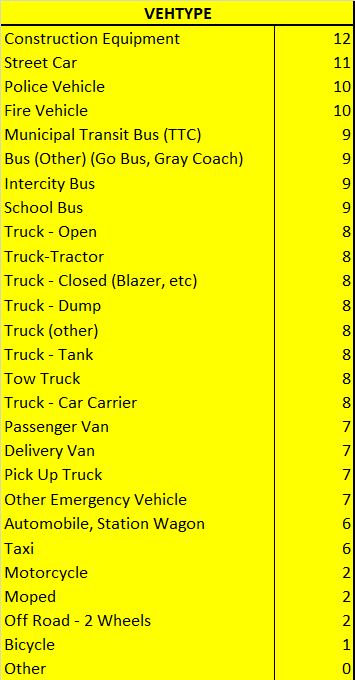

In [249]:
# Creating a dictionary of replacement values
df_reg['VEHTYPE'].replace({'Construction Equipment': '12', 'Street Car': '11', 'Police Vehicle': '10', 'Fire Vehicle': '10', 'Municipal Transit Bus (TTC)': '9', 'Bus (Other) (Go Bus, Gray Coach)': '9', 'Intercity Bus': '9', 'School Bus': '9', 'Truck - Open': '8', 'Truck-Tractor': '8', 'Truck - Closed (Blazer, etc)': '8', 'Truck - Dump': '8', 'Truck (other)': '8', 'Truck - Tank': '8', 'Tow Truck': '8', 'Truck - Car Carrier': '8', 'Passenger Van': '7', 'Delivery Van': '7', 'Pick Up Truck': '7', 'Other Emergency Vehicle': '7', 'Automobile, Station Wagon': '6', 'Taxi': '6', 'Motorcycle': '2', 'Moped': '2', 'Off Road - 2 Wheels': '2', 'Bicycle': '1', 'Other': '0'})

0        NaN
1        NaN
2          6
3        NaN
4        NaN
        ... 
16088      6
16089    NaN
16090      6
16091      6
16092    NaN
Name: VEHTYPE, Length: 16093, dtype: object

In [250]:
# Passing the dictionary of replacement values into the Series replace method - 'Small'
df_reg['VEHTYPE']=df_reg['VEHTYPE'].replace({'Construction Equipment': '12', 'Street Car': '11', 'Police Vehicle': '10', 'Fire Vehicle': '10', 'Municipal Transit Bus (TTC)': '9', 'Bus (Other) (Go Bus, Gray Coach)': '9', 'Intercity Bus': '9', 'School Bus': '9', 'Truck - Open': '8', 'Truck-Tractor': '8', 'Truck - Closed (Blazer, etc)': '8', 'Truck - Dump': '8', 'Truck (other)': '8', 'Truck - Tank': '8', 'Tow Truck': '8', 'Truck - Car Carrier': '8', 'Passenger Van': '7', 'Delivery Van': '7', 'Pick Up Truck': '7', 'Other Emergency Vehicle': '7', 'Automobile, Station Wagon': '6', 'Taxi': '6', 'Motorcycle': '2', 'Moped': '2', 'Off Road - 2 Wheels': '2', 'Bicycle': '1', 'Other': '0'})

In [251]:
print(df_reg.groupby("VEHTYPE").size())

VEHTYPE
0     4745
1      680
10       7
11      39
12       4
2      574
6     6622
7      321
8      309
9      265
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [252]:
4745+680+7+39+4+574+6622+321+309+265

13566

In [253]:
print(df.groupby("VEHTYPE").size())

VEHTYPE
Automobile, Station Wagon           6594
Bicycle                              680
Bus (Other) (Go Bus, Gray Coach)      11
Construction Equipment                 4
Delivery Van                          63
Fire Vehicle                           3
Intercity Bus                          9
Moped                                 22
Motorcycle                           551
Municipal Transit Bus (TTC)          241
Off Road - 2 Wheels                    1
Other                               4745
Other Emergency Vehicle                1
Passenger Van                        105
Pick Up Truck                        152
Police Vehicle                         4
School Bus                             4
Street Car                            39
Taxi                                  28
Tow Truck                              4
Truck (other)                         12
Truck - Car Carrier                    1
Truck - Closed (Blazer, etc)          50
Truck - Dump                          32
Truck - 

In [254]:
6594+680+11+4+63+3+9+22+551+241+1+4745+1+105+152+4+4+39+28+4+12+1+50+32+173+7+30

13566

<i>Perfect! All records are included in our reclassification for VEHTYPE.</i>

#### <i>DRIVCOND

The DRIVCOND (Driver Condition) feature will be graded based on the severity of the condition of the driver from 8 to 0, with 8 being in the worst condition to drive (Ability Impaired, Alcohol over .08) and 0 being the least, or inconsequential for our purposes (Normal, Other, Unknown):


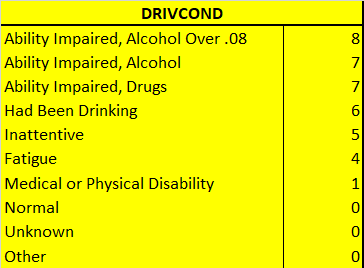

In [255]:
# Creating a dictionary of replacement values 
df_reg['DRIVCOND'].replace({'Ability Impaired, Alcohol Over .08': '8', 'Ability Impaired, Alcohol': '7', 'Ability Impaired, Drugs': '7', 'Had Been Drinking': '6', 'Inattentive': '5', 'Fatigue': '4', 'Medical or Physical Disability': '1', 'Normal': '0', 'Unknown': '0', 'Other': '0'})

0        NaN
1        NaN
2          0
3        NaN
4        NaN
        ... 
16088      0
16089    NaN
16090      5
16091      0
16092    NaN
Name: DRIVCOND, Length: 16093, dtype: object

In [256]:
# Passing the dictionary of replacement values into the Series replace method - 'Small'
df_reg['DRIVCOND']=df_reg['DRIVCOND'].replace({'Ability Impaired, Alcohol Over .08': '8', 'Ability Impaired, Alcohol': '7', 'Ability Impaired, Drugs': '7', 'Had Been Drinking': '6', 'Inattentive': '5', 'Fatigue': '4', 'Medical or Physical Disability': '1', 'Normal': '0', 'Unknown': '0', 'Other': '0'})

In [257]:
print(df_reg.groupby("DRIVCOND").size())

DRIVCOND
0    6128
1     156
4      47
5    1318
6     146
7     122
8     115
dtype: int64


<i>Our feature is now reclassified. Let's make sure it contains the same amount of rows.</i>

In [258]:
6128+156+47+1318+146+122+115

8032

In [259]:
print(df.groupby("DRIVCOND").size())

DRIVCOND
Ability Impaired, Alcohol              106
Ability Impaired, Alcohol Over .08     115
Ability Impaired, Drugs                 16
Fatigue                                 47
Had Been Drinking                      146
Inattentive                           1318
Medical or Physical Disability         156
Normal                                5167
Other                                   41
Unknown                                920
dtype: int64


In [260]:
106+115+16+47+146+1318+156+5167+41+920

8032

<i>Perfect! All records are included in our reclassification for VEHTYPE.</i>

Our features have been engineered and scaled. Now let's address the missing values.

## <u>Missing Values</u>

Variables to highlight in dataset for prediction:

    ROAD_CLASS
    WardNum
    Division
    TRAFFCTL
    VISIBILITY
    LIGHT
    RDSFCOND
    INVTYPE
    INVAGE
    INJURY
    VEHTYPE
    DRIVCOND

In [261]:
df_reg.ROAD_CLASS.value_counts(dropna=False)

8      11555
6       2462
4        900
5        727
NaN      368
0         46
9         24
3         10
7          1
Name: ROAD_CLASS, dtype: int64

In [262]:
df_reg.WardNum.value_counts(dropna=False)

NaN     2298
10.0     930
1.0      867
3.0      740
11.0     738
5.0      719
14.0     712
4.0      639
21.0     630
13.0     618
9.0      607
22.0     563
23.0     558
6.0      544
7.0      505
20.0     486
18.0     459
24.0     438
2.0      437
25.0     423
8.0      421
19.0     409
17.0     388
16.0     373
12.0     347
15.0     244
Name: WardNum, dtype: int64

In [263]:
df_reg.Division.value_counts(dropna=False)

42    1612
32    1237
41    1218
23    1200
14    1088
22    1020
43    1004
53     902
31     853
52     852
51     845
33     839
12     807
54     706
11     670
13     659
55     581
Name: Division, dtype: int64

In [264]:
df_reg.TRAFFCTL.value_counts(dropna=False)

1      7692
9      6771
7      1288
6       189
8       102
NaN      29
5        13
11        5
2         2
10        2
Name: TRAFFCTL, dtype: int64

In [265]:
df_reg.VISIBILITY.value_counts(dropna=False)

1      13814
4       1711
5        377
0         99
6         43
NaN       22
7         19
3          8
Name: VISIBILITY, dtype: int64

In [266]:
df_reg.LIGHT.value_counts(dropna=False)

2    9255
6    3525
5    2609
4     323
3     251
1     124
0       6
Name: LIGHT, dtype: int64

In [267]:
df_reg.RDSFCOND.value_counts(dropna=False)

1      12820
3       2718
6        258
0        147
8         73
7         42
NaN       27
4          7
5          1
Name: RDSFCOND, dtype: int64

In [268]:
df_reg.INVTYPE.value_counts(dropna=False)

2      11341
7       2717
6        691
5        608
0        414
1        299
8         13
NaN       10
Name: INVTYPE, dtype: int64

In [269]:
df_reg.INVAGE.value_counts(dropna=False)

0     2541
5     1484
6     1417
7     1174
11    1150
8     1136
9     1134
10    1104
12     937
13     743
4      738
14     586
15     463
16     390
17     292
3      214
18     191
2      175
1      156
19      54
20      14
Name: INVAGE, dtype: int64

In [270]:
df_reg.INJURY.value_counts(dropna=False)

1      6068
4      5375
NaN    1609
3      1264
2       996
5       781
Name: INJURY, dtype: int64

In [271]:
df_reg.VEHTYPE.value_counts(dropna=False)

6      6622
0      4745
NaN    2527
1       680
2       574
7       321
8       309
9       265
11       39
10        7
12        4
Name: VEHTYPE, dtype: int64

In [272]:
df_reg.DRIVCOND.value_counts(dropna=False)

NaN    8061
0      6128
5      1318
1       156
6       146
7       122
8       115
4        47
Name: DRIVCOND, dtype: int64

We want to keep all the <b>INJURY</b> records since it is our target value- we will drop any NaN values in this column.

In [273]:
df_reg_aug1 = df_reg.dropna(subset = ['INJURY'], how='all')

In [274]:
print(df_reg.shape)
print(df_reg_aug1.shape)

(16093, 56)
(14484, 56)


In [275]:
df_reg_aug1.isnull().sum()

X                    0
Y                    0
Index_               0
ACCNUM               0
YEAR                 0
DATE                 0
TIME                 0
HOUR                 0
STREET1              0
STREET2           1276
OFFSET           12099
ROAD_CLASS         313
District            13
WardNum           2086
Division             0
LATITUDE             0
LONGITUDE            0
LOCCOORD           127
ACCLOC            4583
TRAFFCTL            29
VISIBILITY          21
LIGHT                0
RDSFCOND            26
ACCLASS              0
IMPACTYPE            4
INVTYPE              5
INVAGE               0
INJURY               0
FATAL_NO         13811
INITDIR           3244
VEHTYPE           2450
MANOEUVER         5360
DRIVACT           6463
DRIVCOND          6463
PEDTYPE          11914
PEDACT           11920
PEDCOND          11800
CYCLISTYPE       13843
CYCACT           13818
CYCCOND          13819
PEDESTRIAN        8564
CYCLIST          12953
AUTOMOBILE        1234
MOTORCYCLE 

There are still missing values for the following features that we are interested in:

    ROAD_CLASS - 313
    WardNum - 2086
    Division - 0
    TRAFFCTL - 29
    VISIBILITY - 21
    LIGHT - 0
    RDSFCOND - 26
    INVTYPE - 5
    INVAGE - 0 
    INJURY - 0
    VEHTYPE - 2450
    DRIVCOND - 6463

Since the <b>WardNum</b> and <b>Division</b> have a strong correlation based on the heatmap we will drop <b>WardNum</b> as a feature since it has too many missing values.

Let's look at <b>ROAD_CLASS</b>, <b>VEHTYPE</b> and <b>DRIVCOND</b> since they have large missing values. Each of these features have a scale value of 0 to represent "unknown" or "other" so let's replace NaN with 0 since we cannot change their values in any valid way; also we would like to keep these features for now.

In [276]:
df_reg_aug1['ROAD_CLASS'] = df_reg_aug1['ROAD_CLASS'].fillna(0)

<ipython-input-276-481851332bba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_aug1['ROAD_CLASS'] = df_reg_aug1['ROAD_CLASS'].fillna(0)


In [277]:
df_reg_aug1['VEHTYPE'] = df_reg_aug1['VEHTYPE'].replace(np.nan, 0)

<ipython-input-277-cea823eb9ba5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_aug1['VEHTYPE'] = df_reg_aug1['VEHTYPE'].replace(np.nan, 0)


In [278]:
df_reg_aug1['DRIVCOND'] = df_reg_aug1['DRIVCOND'].fillna(0)


<ipython-input-278-299621cda9be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_aug1['DRIVCOND'] = df_reg_aug1['DRIVCOND'].fillna(0)


In [279]:
df_reg_aug1.shape
# No records have been lost compared to before when doing this replace of Nan values.

(14484, 56)

In [280]:
df_reg_aug1.isnull().sum()

X                    0
Y                    0
Index_               0
ACCNUM               0
YEAR                 0
DATE                 0
TIME                 0
HOUR                 0
STREET1              0
STREET2           1276
OFFSET           12099
ROAD_CLASS           0
District            13
WardNum           2086
Division             0
LATITUDE             0
LONGITUDE            0
LOCCOORD           127
ACCLOC            4583
TRAFFCTL            29
VISIBILITY          21
LIGHT                0
RDSFCOND            26
ACCLASS              0
IMPACTYPE            4
INVTYPE              5
INVAGE               0
INJURY               0
FATAL_NO         13811
INITDIR           3244
VEHTYPE              0
MANOEUVER         5360
DRIVACT           6463
DRIVCOND             0
PEDTYPE          11914
PEDACT           11920
PEDCOND          11800
CYCLISTYPE       13843
CYCACT           13818
CYCCOND          13819
PEDESTRIAN        8564
CYCLIST          12953
AUTOMOBILE        1234
MOTORCYCLE 

We now only have four features left that have a few missing values based on the updated feature table below.
    
    ROAD_CLASS - 0
    Division - 0
    TRAFFCTL - 29
    VISIBILITY - 21
    LIGHT - 0
    RDSFCOND - 26
    INVTYPE - 5
    INVAGE - 0 
    INJURY - 0
    VEHTYPE - 0
    DRIVCOND - 0
 
Since we currently have 14,484 records and the missing values are now very small i.e totally 79 records, we will go ahead and remove them since there is not a meaningful way transform them.

In [281]:
df_reg_aug2 = df_reg_aug1.dropna(subset = ['TRAFFCTL'], how='all')

In [282]:
df_reg_aug3 = df_reg_aug2.dropna(subset = ['VISIBILITY'], how='all')

In [283]:
df_reg_aug4 = df_reg_aug3.dropna(subset = ['RDSFCOND'], how='all')

In [284]:
df_reg_aug5 = df_reg_aug4.dropna(subset = ['INVTYPE'], how='all')

In [285]:
df_reg_aug5.shape

(14422, 56)

In [286]:
df_reg_aug5.isnull().sum()

X                    0
Y                    0
Index_               0
ACCNUM               0
YEAR                 0
DATE                 0
TIME                 0
HOUR                 0
STREET1              0
STREET2           1271
OFFSET           12042
ROAD_CLASS           0
District            13
WardNum           2078
Division             0
LATITUDE             0
LONGITUDE            0
LOCCOORD           111
ACCLOC            4557
TRAFFCTL             0
VISIBILITY           0
LIGHT                0
RDSFCOND             0
ACCLASS              0
IMPACTYPE            4
INVTYPE              0
INVAGE               0
INJURY               0
FATAL_NO         13762
INITDIR           3216
VEHTYPE              0
MANOEUVER         5347
DRIVACT           6418
DRIVCOND             0
PEDTYPE          11860
PEDACT           11866
PEDCOND          11744
CYCLISTYPE       13781
CYCACT           13756
CYCCOND          13757
PEDESTRIAN        8525
CYCLIST          12891
AUTOMOBILE        1228
MOTORCYCLE 

## Duplicate Values

In [287]:
df_reg_aug5.duplicated().value_counts()

False    14422
dtype: int64

There are no duplicate values.

## <font color = "blue">Feature Only Dataframe - Regression</font>
    
<font color = "blue">This dataframe will serve as a "master" dataframe for regression modelling for our group, and contains all of our collectively-selected feature variables.</font>

    ROAD_CLASS
    Division
    TRAFFCTRL
    VISIBILITY
    LIGHT
    RDSFCOND
    INVTYPE
    INVAGE
    INJURY
    VEHTYPE
    DRIVCOND

In [288]:
# Create subset of the dataframe with only features that we are interested in.
df_reg_allfeatures = df_reg_aug5.loc[:, ['INJURY', 'ROAD_CLASS', 'Division', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'INVTYPE', 'INVAGE', 'VEHTYPE', 'DRIVCOND']]

In [289]:
df_reg_allfeatures

,INJURY,ROAD_CLASS,Division,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,INVTYPE,INVAGE,VEHTYPE,DRIVCOND
0,4,8,54,1,1,6,3,2,11,0,0
1,3,8,54,1,1,6,3,2,4,0,0
2,3,8,54,1,1,6,3,2,12,6,0
3,3,8,54,1,1,6,3,2,5,0,0
4,3,8,54,1,1,6,3,2,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16088,1,8,31,1,1,5,1,2,5,6,0
16089,4,8,31,1,1,5,1,7,3,0,0
16090,1,8,52,9,1,2,1,2,11,6,5
16091,1,8,52,9,1,2,1,2,6,6,0


In [295]:
df_reg_allfeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14422 entries, 0 to 16092
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   INJURY      14422 non-null  object
 1   ROAD_CLASS  14422 non-null  object
 2   Division    14422 non-null  int64 
 3   TRAFFCTL    14422 non-null  object
 4   VISIBILITY  14422 non-null  object
 5   LIGHT       14422 non-null  object
 6   RDSFCOND    14422 non-null  object
 7   INVTYPE     14422 non-null  object
 8   INVAGE      14422 non-null  object
 9   VEHTYPE     14422 non-null  object
 10  DRIVCOND    14422 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


Even though we aggregated our features, we will be unable to perform any correlation or regression testing without converting each variable into string data. Let's do that.

In [296]:
df_reg_allfeatures["INJURY"] = df_reg_allfeatures["INJURY"].astype(str).astype(int)
df_reg_allfeatures["ROAD_CLASS"] = df_reg_allfeatures["ROAD_CLASS"].astype(str).astype(int)
df_reg_allfeatures["Division"] = df_reg_allfeatures["Division"].astype(str).astype(int)
df_reg_allfeatures["TRAFFCTL"] = df_reg_allfeatures["TRAFFCTL"].astype(str).astype(int)
df_reg_allfeatures["VISIBILITY"] = df_reg_allfeatures["VISIBILITY"].astype(str).astype(int)
df_reg_allfeatures["LIGHT"] = df_reg_allfeatures["LIGHT"].astype(str).astype(int)
df_reg_allfeatures["RDSFCOND"] = df_reg_allfeatures["RDSFCOND"].astype(str).astype(int)
df_reg_allfeatures["INVTYPE"] = df_reg_allfeatures["INVTYPE"].astype(str).astype(int)
df_reg_allfeatures["INVAGE"] = df_reg_allfeatures["INVAGE"].astype(str).astype(int)
df_reg_allfeatures["VEHTYPE"] = df_reg_allfeatures["VEHTYPE"].astype(str).astype(int)
df_reg_allfeatures["DRIVCOND"] = df_reg_allfeatures["DRIVCOND"].astype(str).astype(int)


In [297]:
df_reg_allfeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14422 entries, 0 to 16092
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   INJURY      14422 non-null  int32
 1   ROAD_CLASS  14422 non-null  int32
 2   Division    14422 non-null  int32
 3   TRAFFCTL    14422 non-null  int32
 4   VISIBILITY  14422 non-null  int32
 5   LIGHT       14422 non-null  int32
 6   RDSFCOND    14422 non-null  int32
 7   INVTYPE     14422 non-null  int32
 8   INVAGE      14422 non-null  int32
 9   VEHTYPE     14422 non-null  int32
 10  DRIVCOND    14422 non-null  int32
dtypes: int32(11)
memory usage: 732.4 KB


Now it's ready for modelling.

### Correlation Matrices with Regression

Now that we have cleaned our categorical data into numerically-scaled fields, let's compare this correlation matrix against the original dataframe's prior to cleaning.

#### Correlation Matrix for Original df dataframe

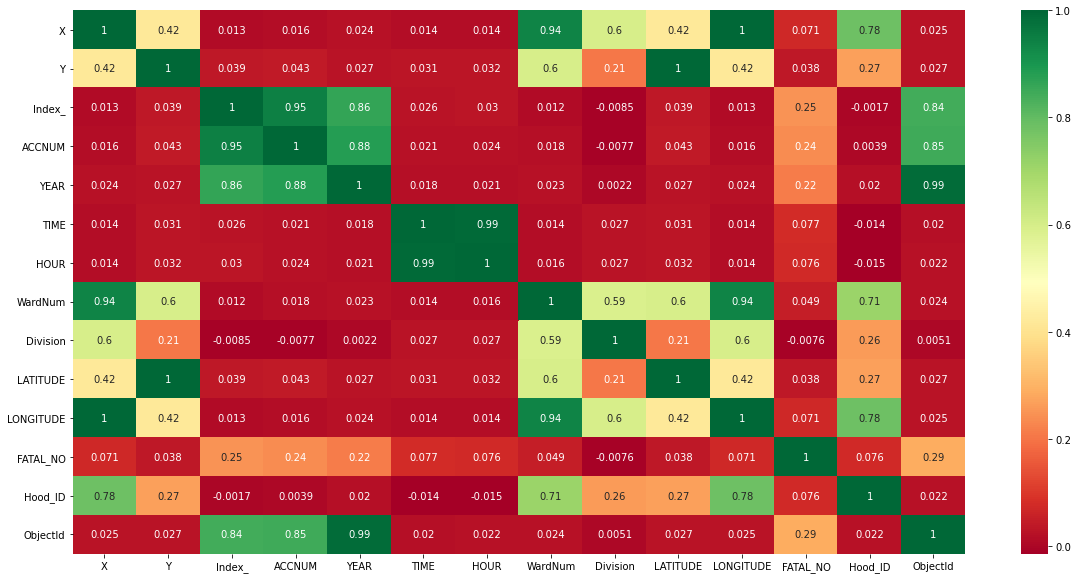

In [298]:
corrmat_df = df.corr()
highest_corr_vars_df = corrmat_df.index
plt.figure(figsize=(20,10))
g = sb.heatmap(df[highest_corr_vars_df].corr(),annot = True,cmap = "RdYlGn")

As we can see in the above, the initial "raw" dataset does not provide any correlations to our chosen variables as it has not yet been translated as numerical data. Unfortunately, These correlations don't tell us much about what we're looking for.

#### Correlation Matrix for New <i>df_reg_allfeatures</i> dataframe - Engineered Scaled Fatures

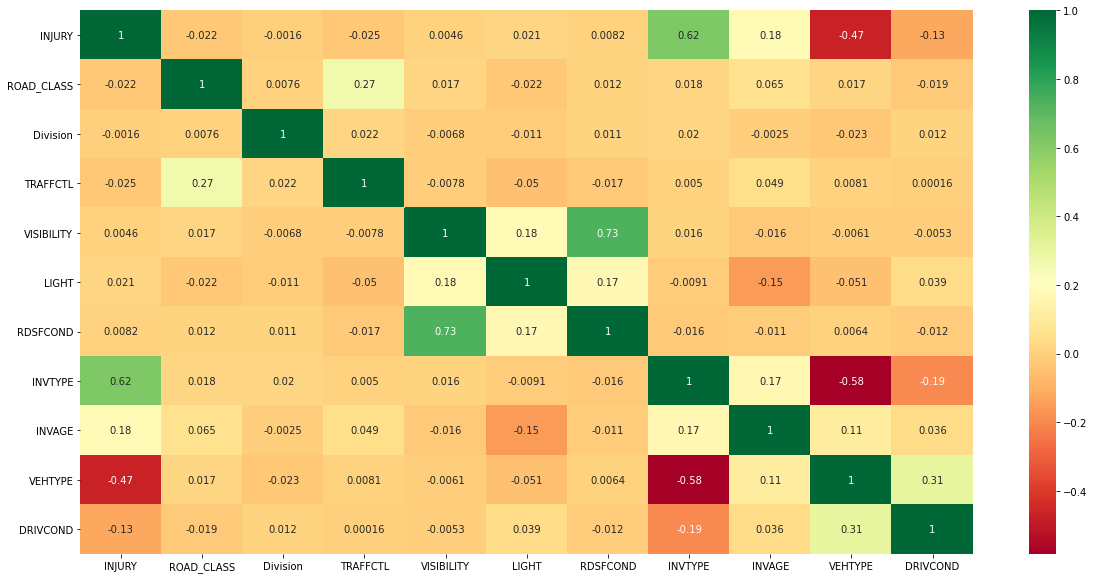

In [299]:
corrmat_df_reg = df_reg_allfeatures.corr()
highest_corr_vars_df_reg = corrmat_df_reg.index
plt.figure(figsize=(20,10))
g = sb.heatmap(df_reg_allfeatures[highest_corr_vars_df_reg].corr(),annot = True,cmap = "RdYlGn")

In analyzing the correlation matrix, there isn't much correlation in our features with the exception of the following:

<b>Strong Positive Correlation between RDSCFCOND and VISIBILITY: <font color = "green">0.73</font></b>
    The correlation between the Road Surface Condition and Visibility is the strongest among the variables. This should be expected, as both of these features are based on the weather conditions of the accident. For both features, the score indicates the severity of the weather that day. For example, if it was snowing, the score would correlate as snow impacts both visibility and road conditions.

<b>Strong Positive Correlation between INVTYPE & INJURY: <font color = "green">0.62</font></b>
    The correlation between the accident party's type of involvement has a strong correlation with the severity of injury. This would make sense, as Pedestrians, Cyclists, and others with a high vulnerability score under "INVTYPE" are more likely to experience more severe injuries than those lower on the vulnerability scale.
    
<b>Moderate Positive Correlation between VEHTYPE & DRIVCOND: <font color = "green">0.31</font></b>
The correlation between the accident party's vehicle type and driving condition is moderately correlated. This is an interesting insight that isn't completely apparent or expected and warrants additional research.

<b>Moderate Positive Correlation between TRAFFCTL & ROAD_CLASS: <font color = "green">0.27</font></b>
As with the strong correlation between the road surface condition and visibility, the correlation between the type of traffic control and road class is to be somewhat expected as different controls are executed under different traffic conditions. For example, one wouldn't expect a school guard or a pedestrian crosswalk to be a control on the Expressway, however it would certainly be suitable for local roads and laneways.

<b>Strong Negative Correlation between VEHTYPE & INJURY: <font color="red">-0.47</font></b>
The correlation between vehicle type and injury would be expected as a negative correlation, since vehicle type is ranked on a scale from strongest vehicle to weakest, whereas injury type ranks from worse injury to no injury. It is therefore a sound assumption that those in stronger vehicles are able to withstand a much greater impact, and therefore, their risk of injury goes down. As such, this negative correlation is sound and speaks to the reasoning behind the group's scaling.

<b>Strong Negative Correlation between VEHTYPE & INVTYPE: <font color="red">-0.58</font></b>
As with the negative correlation above, the negative correlation between the accident party's vehicle type and their involvement type is to be expected, as the involvement type is scaled from most vulnerable to least, and vehicle type is scaled from least vulnerable to most.

## <font color = "red">Individual Modelling Subset Feature and Target Only Dataframe</font>

<font color = "red">To be used by the group to personalize the features to the model being created from the above df_class_allfeatures dataframe. May need to replicate dummy variables.</font>

In [290]:
# Create subset of the dataframe with only features that we are interested in.
df_reg_insertmodelname_features = df_reg_allfeatures.loc[:, ['INJURY', 'ROAD_CLASS', 'LIGHT', 'VISIBILITY', 'VEHTYPE']]

In [291]:
df_reg_insertmodelname_features

,INJURY,ROAD_CLASS,LIGHT,VISIBILITY,VEHTYPE
0,4,8,6,1,0
1,3,8,6,1,0
2,3,8,6,1,6
3,3,8,6,1,0
4,3,8,6,1,0
...,...,...,...,...,...
16088,1,8,5,1,6
16089,4,8,5,1,0
16090,1,8,2,1,6
16091,1,8,2,1,6
